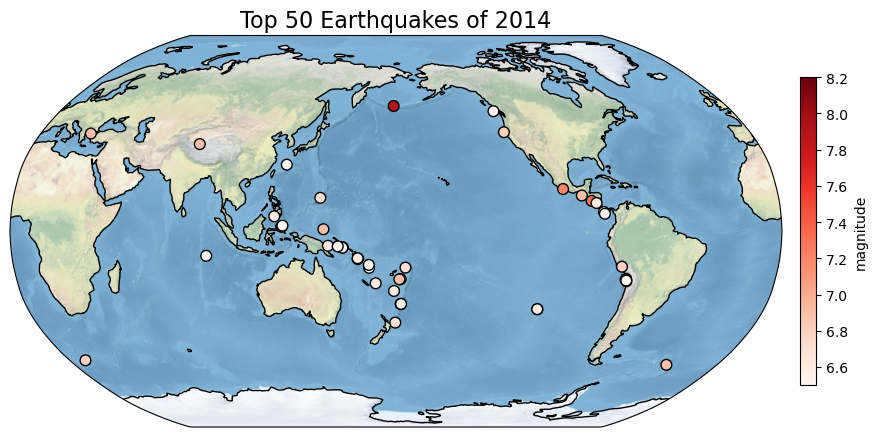

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

#读取数据
data = pd.read_csv("usgs_earthquakes.csv")
#提取前50数据
top50 = data.sort_values("mag", ascending=False).head(50)

#设置画布
plt.figure(figsize=(12, 8))

#设置投影
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
#添加背景，来自gemini
ax.stock_img()
ax.coastlines() 

#绘制散点
sc = ax.scatter(
    top50['longitude'], 
    top50['latitude'], 
    c=top50['mag'],        #颜色根据震级
    cmap='Reds',           #红色系
    s=60,                  #点的大小
    edgecolors='k',        #黑色描边
    transform=ccrs.PlateCarree(), 
    zorder=10
)

#添加图例
cbar = plt.colorbar(sc, orientation='vertical', pad=0.02, shrink=0.5)
cbar.set_label('magnitude')

plt.title('Top 50 Earthquakes of 2014', fontsize=16)
plt.show()


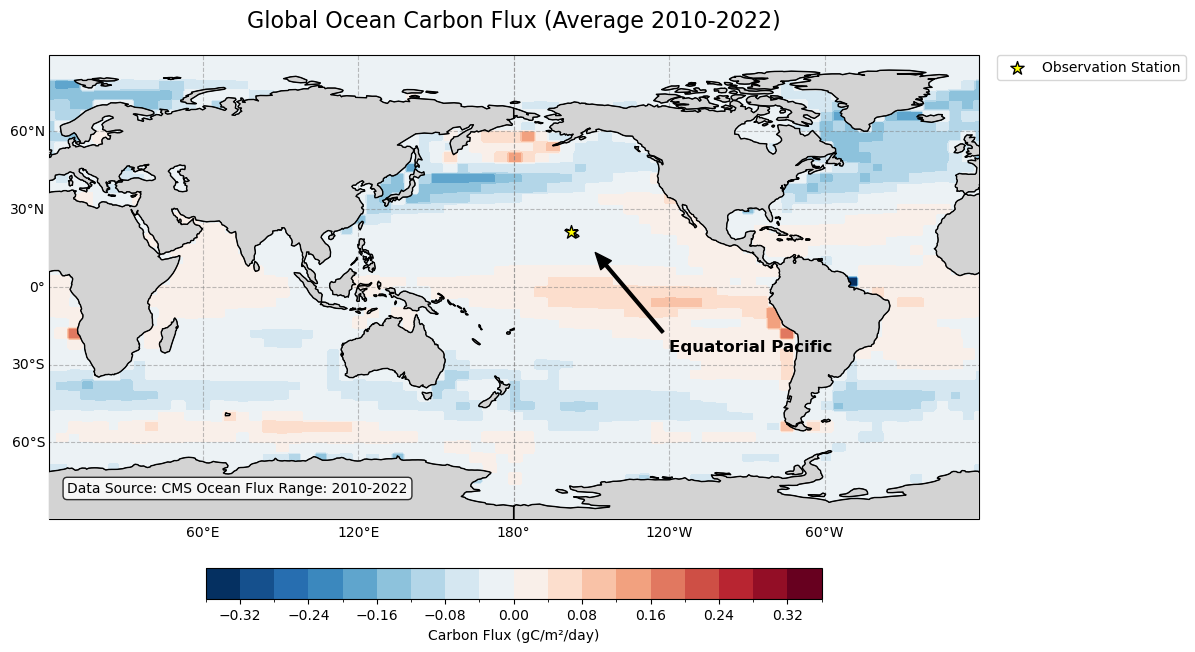

In [18]:
#2.1

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np

car = xr.open_dataset("CMSFluxOcean201001_202212_v3.nc", engine="netcdf4",decode_times=False)

#取时间平均值
data_to_plot = car['ocean_post'].mean(dim='time')

#设置画布
fig = plt.figure(figsize=(12, 8))

#设置投影
proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=proj)

#绘制数据
plot = data_to_plot.plot.contourf(
    ax=ax, 
    transform=ccrs.PlateCarree(),
    levels=20, 
    cmap='RdBu_r', 
    add_colorbar=False
)

#[Masks/Features]设置陆地为灰色
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', zorder=10)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=11)

#[Gridlines]添加网格线
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5, color='gray')
gl.top_labels = False
gl.right_labels = False

#[Labels]
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

#[Title]
plt.title("Global Ocean Carbon Flux (Average 2010-2022)", fontsize=16, pad=20)

#[Colorbar]
cbar = plt.colorbar(plot, ax=ax, orientation='horizontal', pad=0.08, fraction=0.05)
cbar.set_label("Carbon Flux (gC/m²/day)", fontsize=10)

#[Annotations] 添加箭头注释
ax.annotate('Equatorial Pacific', 
            xy=(-150, 15), 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
            xytext=(-120, -25), 
            textcoords=ccrs.PlateCarree()._as_mpl_transform(ax),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=10),
            zorder=20, color='black', fontsize=12, fontweight='bold')

#[Text Box]
textstr = "Data Source: CMS Ocean Flux Range: 2010-2022"

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.02, 0.05, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', bbox=props, zorder=20)

#[Legend]
ax.scatter(-158, 21, color='yellow', s=100, marker='*', transform=ccrs.PlateCarree(), 
           label='Observation Station', zorder=20, edgecolor='black')
#将图例放在外面，防止遮挡
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.show()


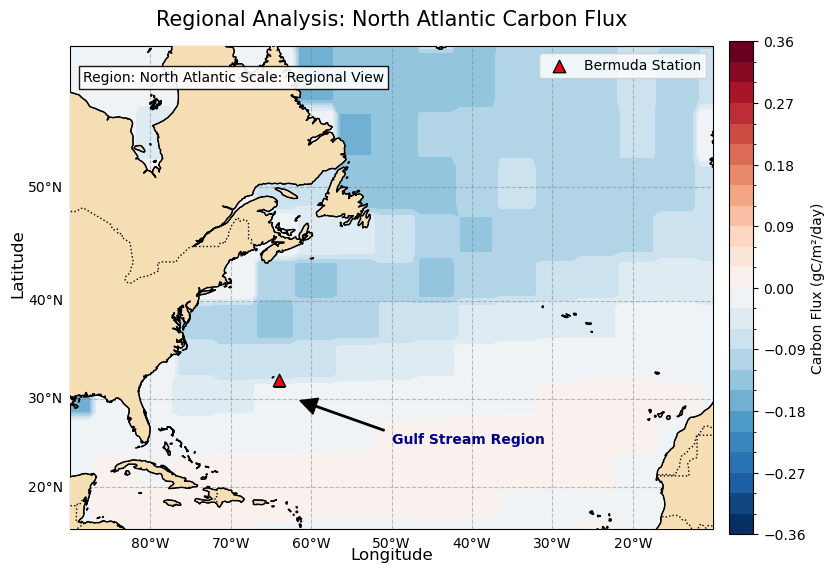

In [20]:
#2.2

data_to_plot = car['ocean_post'].mean(dim='time')

#创建画布
fig = plt.figure(figsize=(10, 8))

#设置墨卡托投影，来自gemini
proj = ccrs.Mercator()
ax = plt.axes(projection=proj)

#设置显示的区域范围
ax.set_extent([-90, -10, 15, 60], crs=ccrs.PlateCarree())

#画图
plot = data_to_plot.plot.contourf(
    ax=ax, 
    transform=ccrs.PlateCarree(),
    levels=25, 
    cmap='RdBu_r', 
    add_colorbar=False
)

#[Masks or Features] 
ax.add_feature(cfeature.LAND, facecolor='wheat', edgecolor='black', zorder=10)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, zorder=11)
ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=11)

#[Gridlines]
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5, color='gray', zorder=12)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

#[X/Y Labels]
ax.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)
ax.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)

#[Title]
plt.title("Regional Analysis: North Atlantic Carbon Flux", fontsize=15, pad=15)

#[Colorbar]
cbar = plt.colorbar(plot, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
cbar.set_label("Carbon Flux (gC/m²/day)", fontsize=10)

#[Annotations]
annotation_text = "Gulf Stream Region"
ax.annotate(annotation_text, 
            xy=(-62, 30), 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
            xytext=(-50, 25), 
            textcoords=ccrs.PlateCarree()._as_mpl_transform(ax),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1),
            zorder=20, color='darkblue', fontsize=10, fontweight='bold')

#[Text Box]
textstr = "Region: North Atlantic Scale: Regional View"
props = dict(boxstyle='square', facecolor='white', alpha=0.9)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, zorder=20)

#[Legend]
ax.scatter(-64, 32, color='red', s=80, marker='^', transform=ccrs.PlateCarree(), 
           label='Bermuda Station', zorder=20, edgecolor='black')
ax.legend(loc='upper right')

plt.show()
